# PROJETO FINAL: TURMA 01 - GRUPO 10

# Integrantes:

i29089 - Nuno Pimentel

i31332 - Jesus Alban

i31433 - Matheus Anjos

i31476 - Diogo Gomes

# Objetivos:
Análise de tendencias relativamente à venda de jogos em diversas plataformas e em diversos países

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
#Variaveis Globais

## Ficheiro CSV de importação
csvFile = 'vgsales-12-4-2019.csv'

## Variaveis a adicionar ao ficheiro de exportação
excelFileName = 'ficheiro.xlsx'
tab1Name = 'Raw Data'
tab2Name = 'Global Sales - Platform'
tab3Name = 'Global Sales - Genre'
tab4name = 'Global Sales - Publisher'
tab5name = 'Sales per Region - Platform'
tab6name = 'Sales per Region - Genre'


# Configuração Pandas CSV
encodingName = 'utf8'
separator = ','

# Configuração do Pandas XLS
engineName = 'xlsxwriter'

# lista de colunas para a limpeza e pre-processamento dos dados
list_columns_delete = ['Rank','basename','VGChartz_Score','Critic_Score','User_Score','Total_Shipped','Last_Update','url','status','Vgchartzscore','img_url','ESRB_Rating']
list_columns_delete_lines_ifnull = ['Genre','Platform','Publisher','Developer','Global_Sales','Year']
list_columns_fill_nulls = ['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']

# Definições gráficas
top_10_sum_platform = 'top_10_sum_platform.png'
top_10_average_platform = 'top_10_average_platform.png'
top_10_sum_genre = 'top_10_sum_genre.png'
top_10_average_genre = 'top_10_average_genre.png'
percentage_genre = 'percentage_genre.png'


# DEFINIR FUNÇÕES

Definição das funções relevantes para os objetivos propostos para o projeto final.

Considerámos as seguintes funções:

1. Remover indice inicial de um dataframe
2. Eliminar uma ou mais colunas de um dataframe
3. Eliminar/filtrar linhas com valores nulos de uma ou mais colunas
4. Converter os valores de uma coluna em integer
5. Preencher vazios de uma ou mais colunas
6. Calcular a soma dos valores de uma coluna por grupo de colunas
7. Calcular a média dos valores de uma coluna por grupo de colunas
8. Calcular a percentagem dos valores de uma coluna por grupo de colunas
9. Criar um gráfico de linhas
10. Criar um gráfico de barras
11. Criar um piechart


In [337]:
# Função para remover a coluna de index de uma dataframe
def transform_remove_index(df):
    return df.drop(df.columns[0], axis=1)

In [338]:
# Função para eliminar colunas de um dataframe

def delete_columns(df, *columns_to_delete):
    columns_list = list(columns_to_delete)
    df = df.drop(columns=columns_list, errors='ignore')
    return df

In [339]:
# Função que filtra o dataframe com base nos valores não nulos de uma ou mais colunas

def filter_not_null(df,*columns_filter):
    try:
        filtered_df = df
        columns_list = list(columns_filter)
        for column in columns_list:
            if column in df.columns:
                filtered_df = filtered_df[filtered_df[column].notnull()]
        return filtered_df
    except:
        print(f'Column {column} not in DataFrame')

In [340]:
# Função que converte os valores de uma ou mais colunas em integer

def convert_int(df,*inColumn):
    columns_list = list(inColumn)
    for column in columns_list:
        if column in df.columns:
            df[column] = df[column].astype(int)
    return df

In [341]:
# Função que preenche os vazios de uma ou mais colunas

def fill_null(df, *column_name ,fill_value=0):
    for column in column_name:
        if column in df.columns:
            df[column] = df[column].fillna(fill_value)
    return df

In [342]:
# AVALIAR SE VAI PARA A VERSÃO FINAL

# Essa função é responsável por criar uma percentagem de linhas null
def count_null(df,inColumn):
    totalRows = len(df)
    countNull = 0
    for i, row in df.iterrows():
        if pd.isnull(row[inColumn]):
            countNull += 1
    percent = round((countNull * 100) / totalRows,2)
    return percent

In [343]:
# ADAPTAR O CÓDIGO PARA VÁRIOS DF E TABS

# Essa função recebe como parâmetro o pd.ExcelWriter, o file e a tab do excel e escreve no ficheiro
def write_xls(inWriter,df,inTab):
    # Falta código para escrever no ficheiro
    df.to_excel(inWriter, sheet_name=inTab,index=False)

In [344]:
# Função que soma os valores de uma coluna e agrupa por uma ou mais colunas
# O reset index cria indexes para a nova lista criada
# A função sort_values ordena os dados por ordem descendente da soma
# No final é renomeada a coluna da soma para o nome que se quiser

def sum_column_by_group(df, inColumn, *group_by_column, sum_column_name='Sum'):
    group_by_list = list(group_by_column)
    df_sum_grouped = df.groupby(group_by_list)[inColumn].sum().reset_index()
    
    df_sum_sorted = df_sum_grouped.sort_values(by=inColumn, ascending = False).reset_index(drop=True)
    df_sum_sorted.rename(columns={inColumn: sum_column_name}, inplace = True)
    return df_sum_sorted

In [345]:
# Função que cacula a média dos valores de uma coluna e agrupa por uma ou mais colunas
# O reset index cria indexes para a nova lista criada
# A função sort_values ordena os dados por ordem descendente da média
# No final é renomeada a coluna da média para o nome que se quiser

def mean_column_by_group(df, inColumn, *group_by_column, avg_column_name='Average'):
    group_by_list = list(group_by_column)
    df_mean_grouped = df.groupby(group_by_list)[inColumn].mean().reset_index()
    
    df_mean_grouped[inColumn] = df_mean_grouped[inColumn].round(2)
                                                    
    df_mean_sorted = df_mean_grouped.sort_values(by=inColumn, ascending = False).reset_index(drop=True)
    df_mean_sorted.rename(columns={inColumn: avg_column_name}, inplace = True)
    return df_mean_sorted

In [346]:
# Função que calcula a percentagem dos valores de uma coluna em função de outra coluna

def percentage_by_group(df,inColumn,group_by_column, per_column_name='percentage'):
    total_sum = df[inColumn].sum()
    Sum_per_group = sum_column_by_group(df, inColumn, group_by_column, sum_column_name=per_column_name)
    i = 0    
    while i < len(Sum_per_group):
        Sum_per_group.loc[i, per_column_name] = round(Sum_per_group.loc[i, per_column_name] / total_sum * 100,2)
        i += 1

    Sum_per_group = Sum_per_group.sort_values(by=per_column_name, ascending = False).reset_index(drop=True)

    return Sum_per_group


In [347]:
# Função com a configuração para o plot de um gráfico de linhas

def plot_trends(df, x_column, y_column, hue_column, title_name, xlabel_name, ylabel_name, marker_type='o', show_legend=False, legend_name=None, image_name='line_plot.png',plotsize=(12, 6)):
    # Define o tamanho da área de plot
    plt.figure(figsize=plotsize)
    
    # Cria o gráfico de linhas
    sns.lineplot(data=df, x=x_column, y=y_column, hue=hue_column, marker=marker_type)
    
    # titulos e labels
    plt.title(title_name)
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
    plt.xticks(rotation=45)

    # Condição se há legenda
    if show_legend and legend_name is not None:
        plt.legend(title=legend_name)

    # Grava com um nome e mostra
    plt.savefig(image_name)
    plt.show()

In [348]:
# Função com a configuração para o plot de um gráfico de barras

def plot_trends_bar(df, x_column, y_column, title_name, xlabel_name, ylabel_name, show_legend=False, legend_name=None, image_name='bar_plot.png',plotsize=(12, 6)):
    # Define o tamanho da área de plot
    plt.figure(figsize=plotsize)
    
    # Cria o gráfico de barras
    sns.barplot(x=x_column,y=y_column,data=df)
    
    # Titulos e labels
    plt.title(title_name)
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
    plt.xticks(rotation=45)

    # Condição se há legenda
    if show_legend and legend_name is not None:
        plt.legend(title=legend_name)

    # Grava com um nome e mostra
    plt.savefig(image_name)
    plt.show()


In [349]:
# Função com a configuração para plot de um piechart

def plot_pie_chart(df, labels_column, values_column, title_name, show_legend=False, legend_name=None, image_name='pie_plot.png', plotsize=(10, 6)):
    # Define o tamanho da área de plot
    plt.figure(figsize=plotsize)

    # Cria o gráfico circular
    plt.pie(df[values_column], labels=df[labels_column], autopct='%1.1f%%', startangle=140)

    # Titulo
    plt.title(title_name)

    # Condição se há legenda
    if show_legend and legend_name is not None:
        plt.legend(title=legend_name)
    
    # Grava com um nome e mostra
    plt.savefig(image_name)
    plt.show()
    

# Tarefa 1: Extração de dados

In [350]:
file = pd.read_csv(csvFile,sep=separator,encoding=encodingName)
file = transform_remove_index(file)

# Tarefa 2:  Limpeza e Pré-Processamento de Dados

In [351]:
file = delete_columns(file,*list_columns_delete)
file = filter_not_null(file,*list_columns_delete_lines_ifnull)
file = convert_int(file,'Year')
file = fill_null(file, *list_columns_fill_nulls)

# Tarefa 3: Exploratory Data Analysis (EDA)

Com base nos dados existentes no dataset é possivel fazer analisar os dados nas seguintes vertentes:

1. Análise das vendas globais por plataforma: Criar dataframes com a soma e a média total de vendas por plataforma e plotar o top 10 em gráficos de barras
2. Análise das vendas globais por género: criar dataframes com a soma, média e percentagem do total de vendas por género e plotar o top 10 em gráficos de barras e um piechart com as percentagens
3. Análise das vendas globais por publisher: Criar dataframes com a soma e média total de vendas por publisher e plotar o top 10 em gráficos de barras
4. Análise das vendas por região por plataforma: Criar as dataframes para a soma e média para cada região por plataforma, unir as dataframes e plotar o top 10 em gráficos de linhas
5. Análise das vendas por região por género: Criar as dataframes para a soma e média para cada região por género, unir as dataframes e plotar o top 10 em gráficos de linhas
6. Análise das vendas por região por publisher: Criar as dataframes para a soma e média para cada região por publisher, unir as dataframes e plotar o top 10 em gráficos de linhas

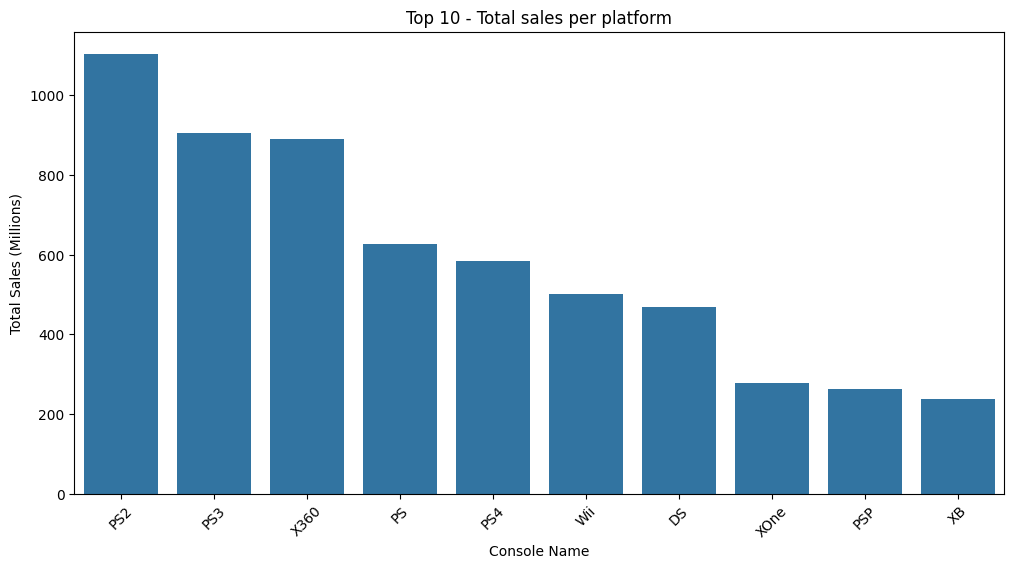

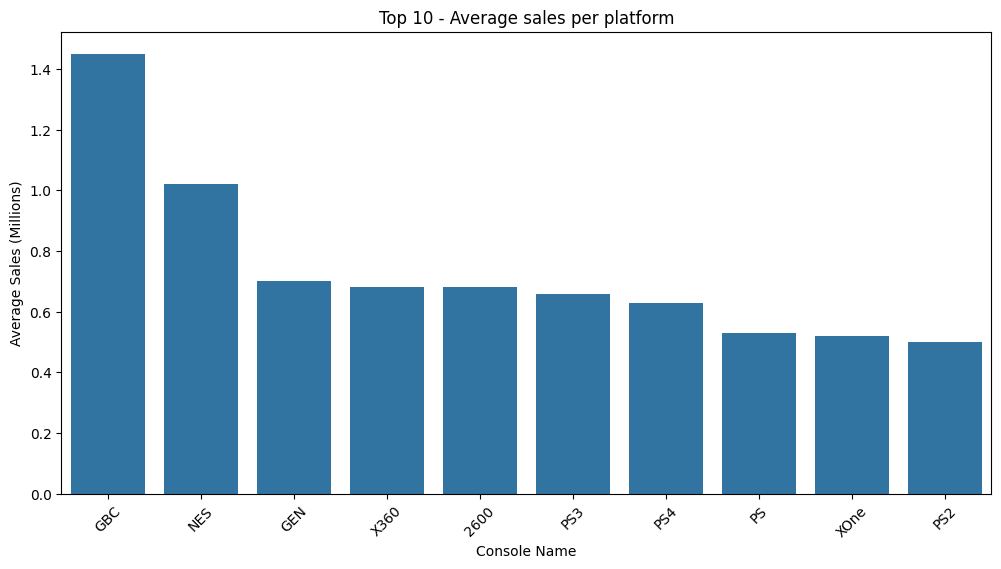

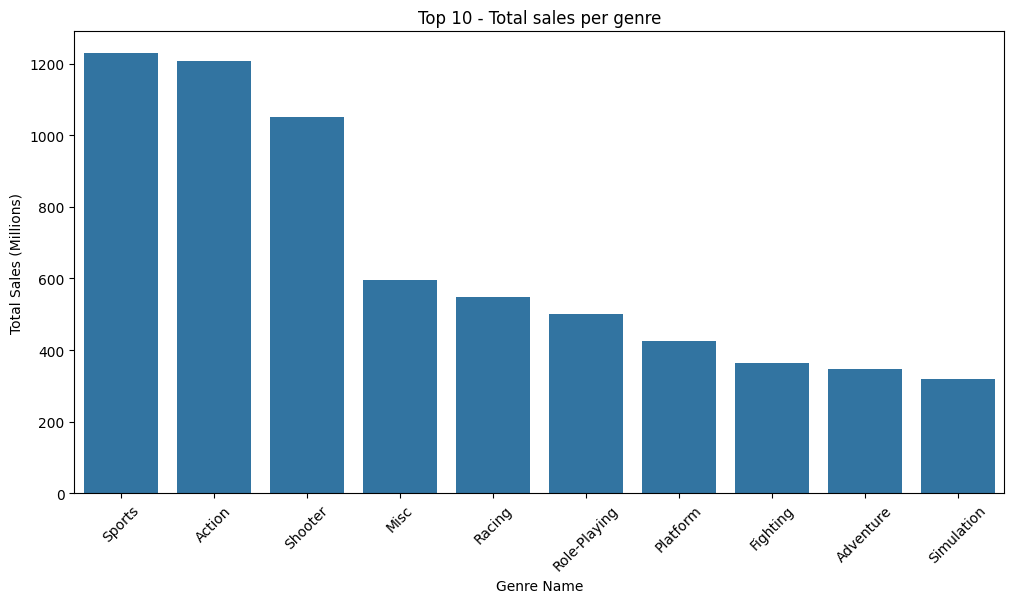

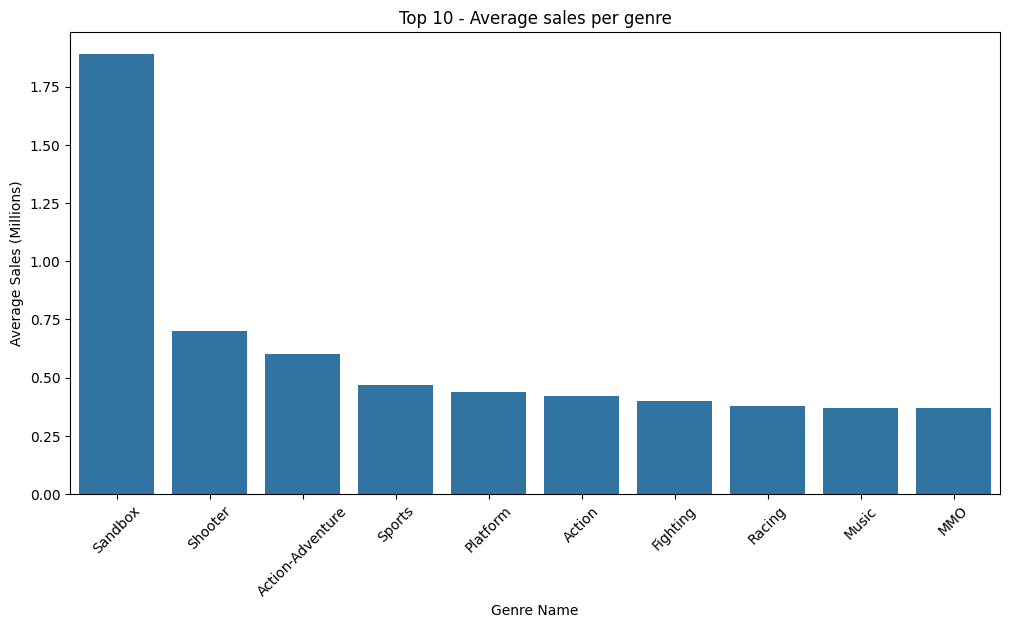

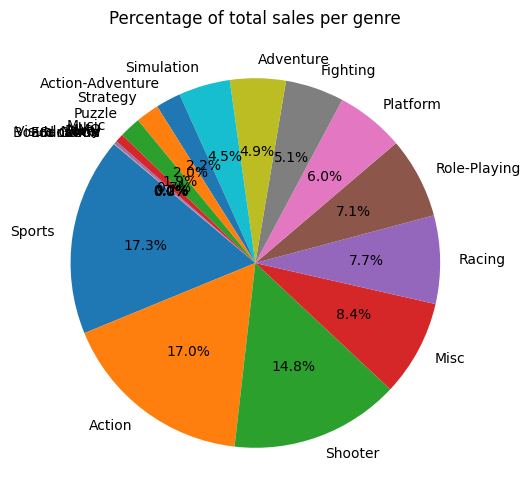

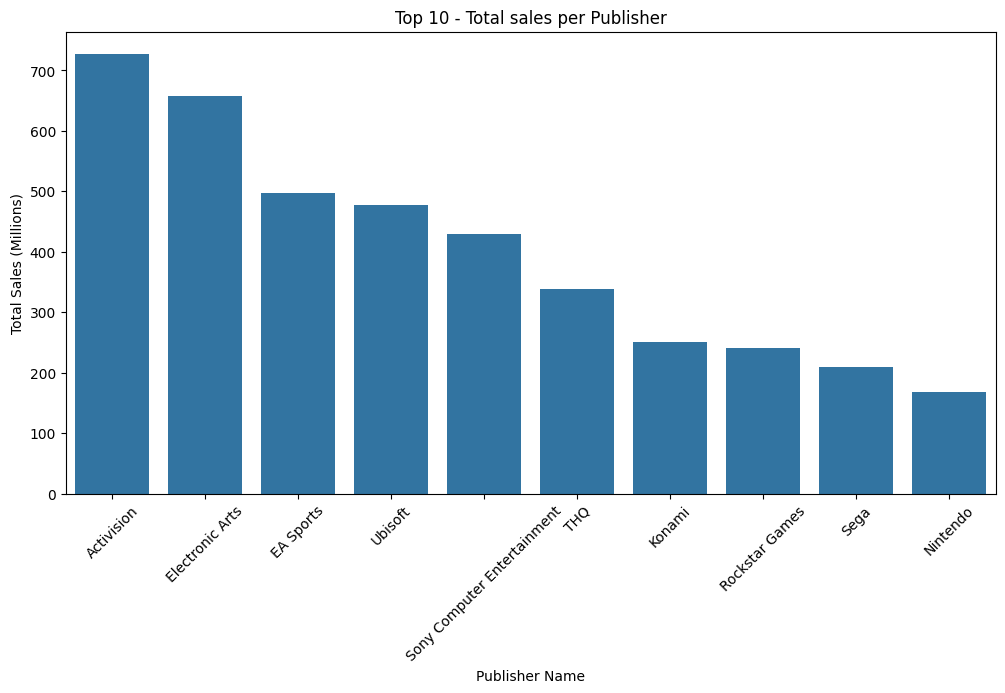

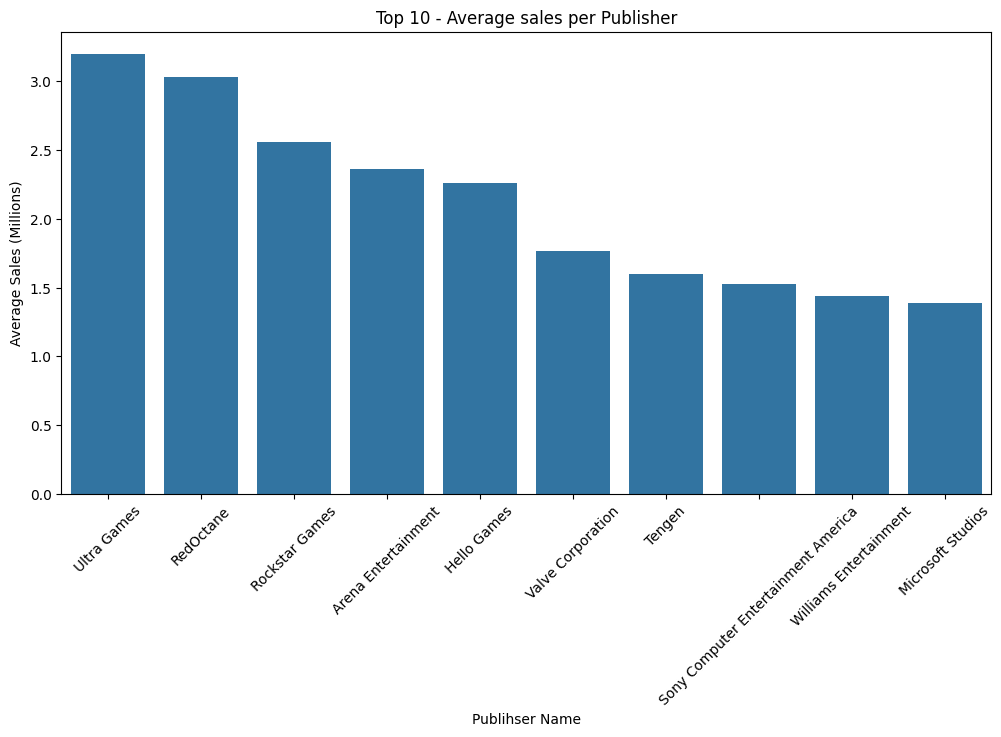

    Platform               Region  Region_Sales
0       X360     Total_NA_Sales_M        547.65
1        PS2     Total_NA_Sales_M        524.04
2        PS3     Total_NA_Sales_M        379.00
3        Wii     Total_NA_Sales_M        306.37
4         PS     Total_NA_Sales_M        299.79
..       ...                  ...           ...
151       NG  Total_Other_Sales_M          0.00
152     PCFX  Total_Other_Sales_M          0.00
153       VC  Total_Other_Sales_M          0.01
154       WS  Total_Other_Sales_M          0.00
155       WW  Total_Other_Sales_M          0.00

[156 rows x 3 columns]


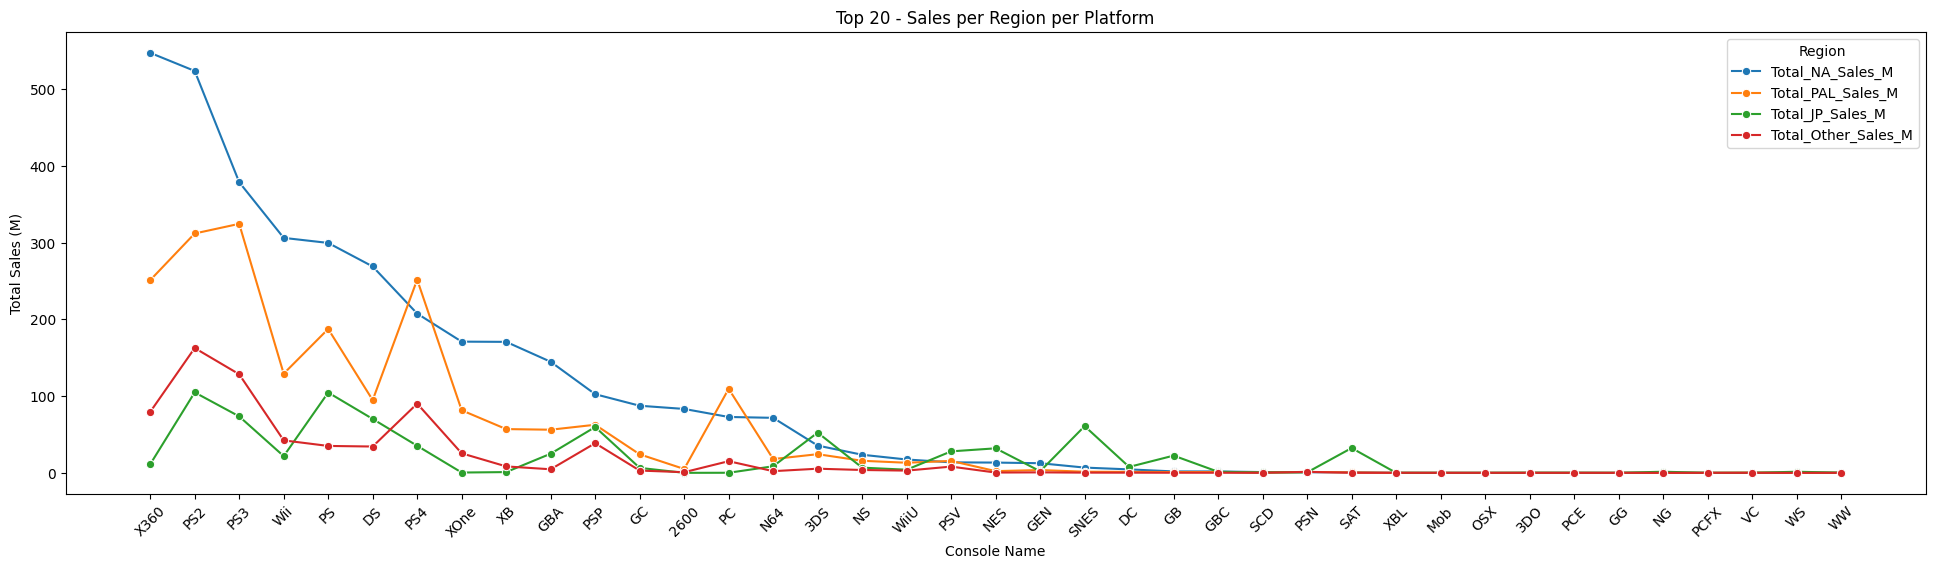

In [352]:
# 1. VENDAS GLOBAIS POR PLATAFORMA

# Total de vendas por plataforma
sum_global_by_platform = sum_column_by_group(file, 'Global_Sales', 'Platform', sum_column_name='Total_Sales_M')

# top_10_global_sales_platforms = sum_global_by_platform.head(10)

# # Aqui o file principal é filtrado somente por as 10 plataformas que mais venderam
# file_filtered_top_10_sales = file[file['Platform'].isin(top_10_global_sales_platforms['Platform'])]

# Média de vendas entre as 10 plataformas que mais venderam jogos
mean_global_by_platform = mean_column_by_group(file, 'Global_Sales', 'Platform', avg_column_name='Average_Sales_M')

plot_trends_bar(sum_global_by_platform.head(10), 'Platform', 'Total_Sales_M', 'Top 10 - Total sales per platform', 'Console Name', 'Total Sales (Millions)', image_name=top_10_sum_platform)
plot_trends_bar(mean_global_by_platform.head(10), 'Platform', 'Average_Sales_M', 'Top 10 - Average sales per platform', 'Console Name', 'Average Sales (Millions)',image_name=top_10_average_platform)

# 2. VENDAS GLOBAIS POR GÉNERO

# Total de vendas por género
sum_global_by_genre = sum_column_by_group(file, 'Global_Sales', 'Genre', sum_column_name='Total_Sales_M')

# Média de vendas por género
mean_global_by_genre = mean_column_by_group(file, 'Global_Sales', 'Genre', avg_column_name='Average_Sales_M')

# Percentagem de vendas por Género
percentage_by_group = percentage_by_group(file,'Global_Sales','Genre',per_column_name ='Percentage')

plot_trends_bar(sum_global_by_genre.head(10), 'Genre', 'Total_Sales_M', 'Top 10 - Total sales per genre', 'Genre Name', 'Total Sales (Millions)',image_name=top_10_sum_genre)
plot_trends_bar(mean_global_by_genre.head(10), 'Genre', 'Average_Sales_M', 'Top 10 - Average sales per genre', 'Genre Name', 'Average Sales (Millions)',image_name=top_10_average_genre)
plot_pie_chart(percentage_by_group, 'Genre', 'Percentage', 'Percentage of total sales per genre',image_name=percentage_genre)

# 3. VENDAS GLOBAIS POR PUBLISHER

# Total de vendas por publisher
sum_global_by_publisher = sum_column_by_group(file, 'Global_Sales', 'Publisher', sum_column_name='Total_Sales_M')

# Média de vendas entre as 10 plataformas que mais venderam jogos
mean_global_by_publisher = mean_column_by_group(file, 'Global_Sales', 'Publisher', avg_column_name='Average_Sales_M')

plot_trends_bar(sum_global_by_publisher.head(10), 'Publisher', 'Total_Sales_M', 'Top 10 - Total sales per Publisher', 'Publisher Name', 'Total Sales (Millions)', image_name=top_10_sum_platform)
plot_trends_bar(mean_global_by_publisher.head(10), 'Publisher', 'Average_Sales_M', 'Top 10 - Average sales per Publisher', 'Publihser Name', 'Average Sales (Millions)',image_name=top_10_average_platform)

# 4. VENDAS POR REGIÂO POR PLATAFORMA

# Vendas por região por plataforma
sum_NA_by_platform = sum_column_by_group(file, 'NA_Sales', 'Platform', sum_column_name='Total_NA_Sales_M')
sum_PAL_by_platform = sum_column_by_group(file, 'PAL_Sales', 'Platform', sum_column_name='Total_PAL_Sales_M')
sum_JP_by_platform = sum_column_by_group(file, 'JP_Sales', 'Platform', sum_column_name='Total_JP_Sales_M')
sum_Other_by_platform = sum_column_by_group(file, 'Other_Sales', 'Platform', sum_column_name='Total_Other_Sales_M')

sum_region_per_platform = sum_NA_by_platform.merge(sum_PAL_by_platform, on = 'Platform').merge(sum_JP_by_platform, on = 'Platform').merge(sum_Other_by_platform, on = 'Platform')

# Média de vendas entre as 10 plataformas que mais venderam jogos
mean_NA_by_platform = mean_column_by_group(file, 'NA_Sales', 'Platform', avg_column_name='Average_NA_Sales_M')
mean_PAL_by_platform = mean_column_by_group(file, 'PAL_Sales', 'Platform', avg_column_name='Average_PAL_Sales_M')
mean_JP_by_platform = mean_column_by_group(file, 'JP_Sales', 'Platform', avg_column_name='Average_JP_Sales_M')
mean_Other_by_platform = mean_column_by_group(file, 'Other_Sales', 'Platform', avg_column_name='Average_Other_Sales_M')

mean_region_per_platform = mean_NA_by_platform.merge(mean_PAL_by_platform, on = 'Platform').merge(mean_JP_by_platform, on = 'Platform').merge(mean_Other_by_platform, on = 'Platform')

melted_sum_region_per_platform = sum_region_per_platform.melt(id_vars='Platform', var_name='Region', value_name='Region_Sales')
print(melted_sum_region_per_platform)

plot_trends(melted_sum_region_per_platform, 'Platform', 'Region_Sales', 'Region', 'Top 20 - Sales per Region per Platform', 'Console Name', 'Total Sales (M)', marker_type='o', show_legend=True, legend_name='Region', image_name='line_plot.png',plotsize=(24, 6))

#plot_trends_bar(sum_global_by_publisher.head(10), 'Publisher', 'Total_Sales_M', 'Top 10 - Total sales per Publisher', 'Publisher Name', 'Total Sales (Millions)', image_name=top_10_sum_platform)
#plot_trends_bar(mean_global_by_publisher.head(10), 'Publisher', 'Average_Sales_M', 'Top 10 - Average sales per Publisher', 'Publihser Name', 'Average Sales (Millions)',image_name=top_10_average_platform)



# Tarefa 4: Gravar dados em ficheiro Excel

In [353]:
# with pd.ExcelWriter(excelFileName, engine=engineName) as writer:
#     file.to_excel(writer, sheet_name=tab1Name, startrow=0, startcol=0, index=False)  # Grava na coluna A
    
#     sum_global_by_platform.to_excel(writer, sheet_name=tab2Name, startrow=0, startcol=0, index=False)  # Grava na coluna A
#     mean_global_by_platform.to_excel(writer, sheet_name=tab2Name, startrow=0, startcol=3, index=False)  # Grava na coluna D
    
#     percentage_by_group.to_excel(writer,sheet_name=tab3Name,startrow=0,startcol=0,index=False)

#     # Inserção do gráfico de barras na tab2
#     worksheet = writer.sheets[tab2Name]
#     x_scale = 0.6  # Reduz para 60% do tamanho original
#     y_scale = 0.6  # Reduz para 60% do tamanho original
#     worksheet.insert_image('I1', top_10_sum_image, {'x_scale': x_scale, 'y_scale': y_scale})

#     worksheet = writer.sheets[tab2Name]
#     x_scale = 0.6  # Reduz para 60% do tamanho original
#     y_scale = 0.6  # Reduz para 60% do tamanho original
#     worksheet.insert_image('I20', average_global_sum_image, {'x_scale': x_scale, 'y_scale': y_scale})


#     # Inserção do gráfico de barras na tab3
#     worksheet = writer.sheets[tab3Name]
#     x_scale = 1.0  # Tamanho original
#     y_scale = 1.0  # Tamanho original
#     worksheet.insert_image('D1', percentage_genre, {'x_scale': x_scale, 'y_scale': y_scale})


# writer.close()